Import libraries to begin the data analysis process

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

**Importing data**

In [3]:
zip_file_path = 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'

In [4]:
df = pd.read_csv(zip_file_path)

<ipython-input-4-12b2841d0023>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(zip_file_path)


In [5]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TN,38119,NaN,Other,Web,2024-02-22,In progress,Yes,NaN,8395409
1,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92805,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8395465
2,2024-02-15,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,VA,233XX,NaN,Other,Web,2024-02-15,In progress,Yes,NaN,8354126
3,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MI,48026,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8395133
4,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32824,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8395340


**Data Analysis**

In [6]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746068 entries, 0 to 4746067
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 651.

In [8]:
df.shape

(4746068, 18)

In [9]:
df['Consumer consent provided?']

0                         Other
1                           NaN
2                         Other
3                           NaN
4                           NaN
                   ...         
4746063                   Other
4746064                     NaN
4746065                   Other
4746066    Consent not provided
4746067    Consent not provided
Name: Consumer consent provided?, Length: 4746068, dtype: object

In [10]:
df[df['Consumer disputed?'] == 'Yes'].shape[0]

148378

In [11]:
nan_values = df[df['Consumer consent provided?'].isna()]
nan_values

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,92805,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8395465
3,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MI,48026,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8395133
4,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,32824,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8395340
5,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",SC,29072,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8395150
6,2024-02-22,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NC,27893,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8395165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746048,2022-03-10,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,NaN,NaN,KEYCORP,PA,19464,NaN,NaN,Postal mail,2022-03-10,Closed with explanation,Yes,NaN,5308965
4746051,2022-03-11,Checking or savings account,Other banking product or service,Managing an account,Banking errors,NaN,NaN,JPMORGAN CHASE & CO.,CA,91201,NaN,NaN,Phone,2022-03-11,Closed with explanation,Yes,NaN,5318315
4746057,2023-08-09,"Payday loan, title loan, or personal loan",Payday loan,Struggling to pay your loan,NaN,NaN,NaN,CCF Intermediate Holdings LLC,AZ,85233,Older American,NaN,Phone,2023-08-09,Closed with explanation,Yes,NaN,7376851
4746062,2023-07-31,"Money transfer, virtual currency, or money ser...",Money order,Lost or stolen money order,NaN,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,TX,78232,NaN,NaN,Phone,2023-08-10,Closed with explanation,Yes,NaN,7328868


In [12]:
# Count the occurrences of each category
issue_counts = df['Issue'].value_counts()
issue_counts

Incorrect information on your report                                                1337530
Improper use of your report                                                          691459
Problem with a credit reporting company's investigation into an existing problem     589338
Attempts to collect debt not owed                                                    198270
Problem with a company's investigation into an existing problem                      129984
                                                                                     ...   
Problem with an overdraft                                                                 9
Lender damaged or destroyed vehicle                                                       8
Property was damaged or destroyed property                                                7
Lender sold the property                                                                  7
Lender damaged or destroyed property                                            

In [14]:
product_counts = df['Product'].value_counts()

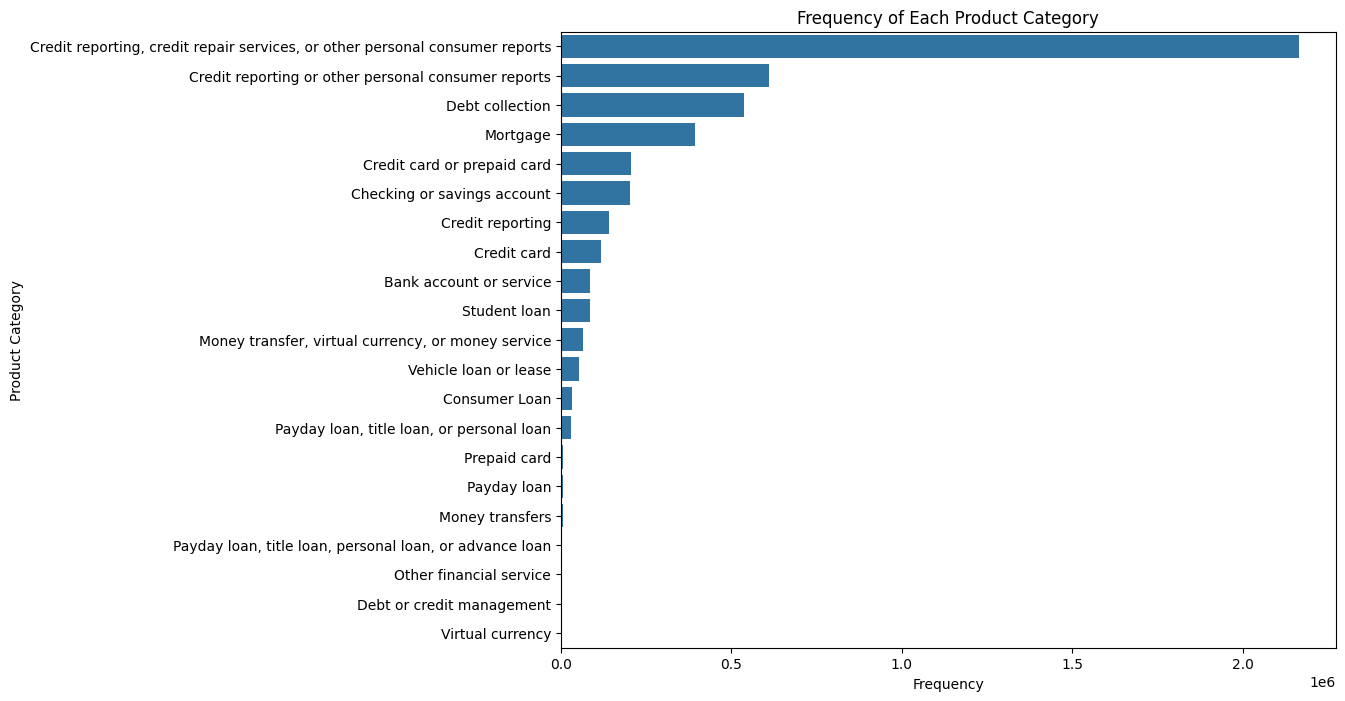

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x=product_counts.values, y=product_counts.index, orient='h')
plt.title('Frequency of Each Product Category')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.show()

In [16]:
company_response = df['Company response to consumer'].value_counts()

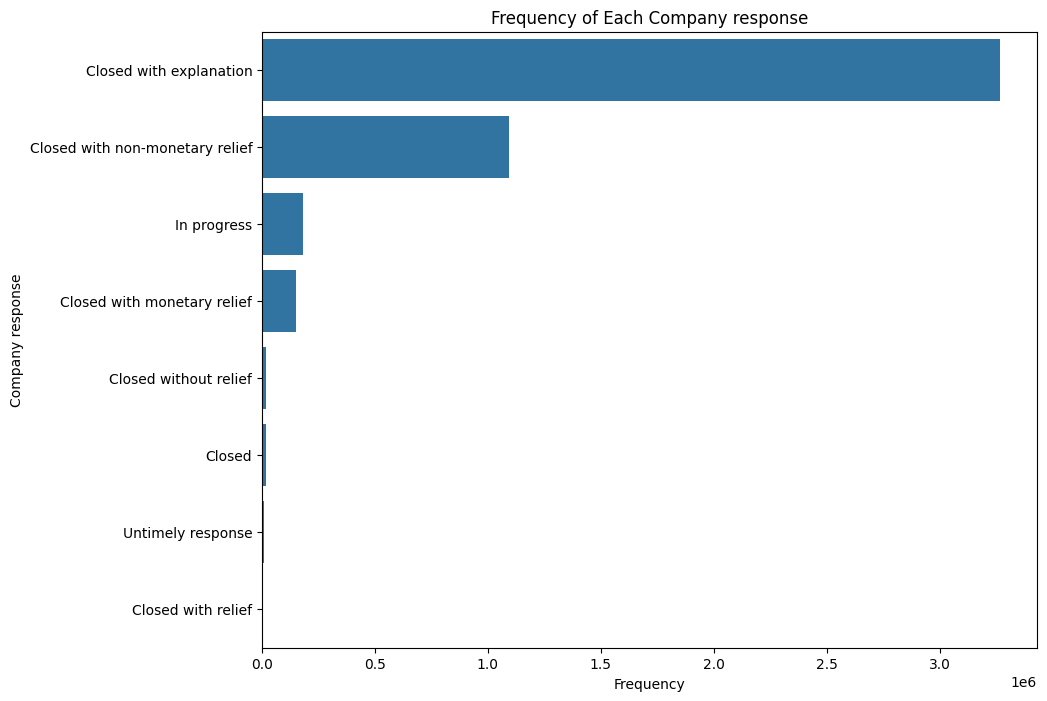

In [17]:
plt.figure(figsize=(10, 8))
sns.barplot(x=company_response.values, y=company_response.index, orient='h')
plt.title('Frequency of Each Company response')
plt.xlabel('Frequency')
plt.ylabel('Company response')
plt.show()

In [18]:
consumer_disputed = df['Consumer disputed?'].value_counts()

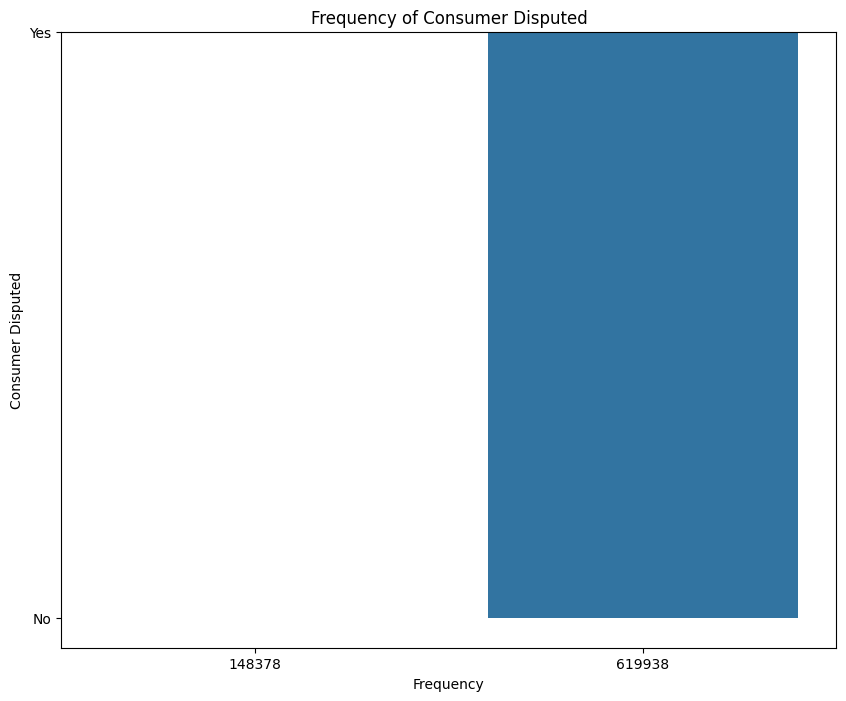

In [19]:
plt.figure(figsize=(10, 8))
sns.barplot(x=consumer_disputed.values, y=consumer_disputed.index, orient='v')
plt.title('Frequency of Consumer Disputed')
plt.xlabel('Frequency')
plt.ylabel('Consumer Disputed')
plt.show()

In [20]:
# Convert 'Consumer disputed?' to numerical format: 1 for 'Yes' and 0 for 'No'
df['Consumer disputed?'] = df['Consumer disputed?'].map({'Yes': 1, 'No': 0})

# Example for 'Timely response?'
df['Timely response?'] = df['Timely response?'].map({'Yes': 1, 'No': 0})


In [21]:
# Convert dates to datetime objects
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])

# Calculate response time in days
df['Response time (days)'] = (df['Date sent to company'] - df['Date received']).dt.days


Text(0.5, 1.0, 'Correlation Matrix')

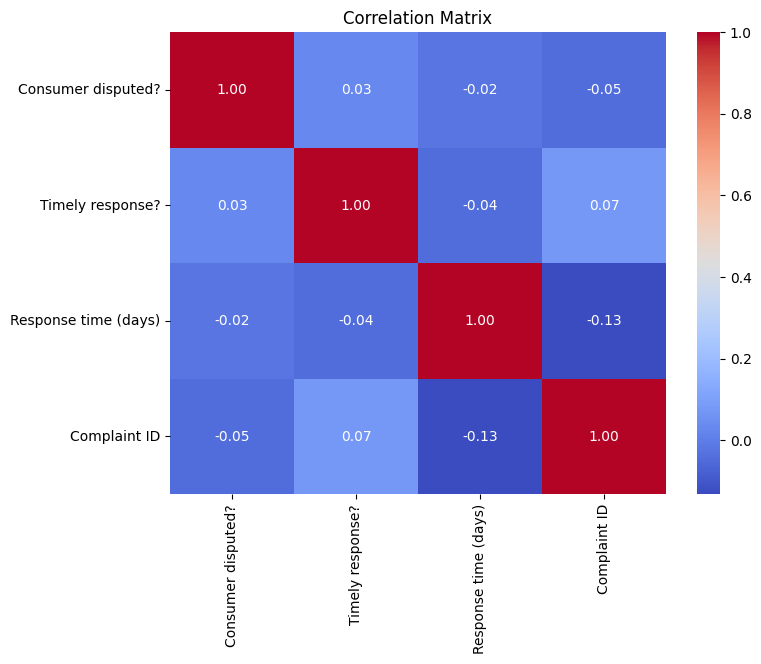

In [22]:
# Assuming 'Consumer disputed?' and 'Timely response?' are now numerical
correlation_matrix = df[['Consumer disputed?', 'Timely response?', 'Response time (days)', 'Complaint ID']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')

**Impute missing values with 'Unknown' or the most common value**

In [23]:
missing_data = df.isnull().sum()

In [24]:
missing_data

Date received                         0
Product                               0
Sub-product                      235290
Issue                                 0
Sub-issue                        728429
Consumer complaint narrative    3047635
Company public response         2501176
Company                               0
State                             44414
ZIP code                          30224
Tags                            4282859
Consumer consent provided?       964055
Submitted via                         0
Date sent to company                  0
Company response to consumer          8
Timely response?                      0
Consumer disputed?              3977752
Complaint ID                          0
Response time (days)                  0
dtype: int64

In [25]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Response time (days)'],
      dtype='object')

In [26]:
# Use the correct DataFrame and column name
df = df.dropna(subset=['Consumer disputed?'])  # Assuming 'Consumer disputed?' is the correct name

Imputing values

In [27]:
imputer = SimpleImputer(strategy='most_frequent')

In [28]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [29]:
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

<ipython-input-29-ab7f79dd444c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = imputer.fit_transform(df[categorical_cols])


In [30]:
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

<ipython-input-30-6a4966ffe8bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].fillna('Unknown')


In [31]:
if 'Consumer disputed?' in df.columns:
    df['Consumer disputed?'] = pd.to_numeric(df['Consumer disputed?'], errors='coerce')  # Ensure it's numeric
    df['Consumer disputed?'] = df['Consumer disputed?'].fillna(df['Consumer disputed?'].median())  # Replace NaN with media

<ipython-input-31-cd091efdc86a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consumer disputed?'] = pd.to_numeric(df['Consumer disputed?'], errors='coerce')  # Ensure it's numeric
<ipython-input-31-cd091efdc86a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consumer disputed?'] = df['Consumer disputed?'].fillna(df['Consumer disputed?'].median())  # Replace NaN with media


In [32]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Response time (days)
176031,2015-05-28,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,I am filing this complaint because Experian ha...,Company has responded to the consumer and the ...,Ditech Financial LLC,FL,33612,Older American,Other,Web,2015-05-28,Closed with explanation,1,0.0,1395481,0
177165,2017-03-20,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,XXXX later to become Navient held both federal...,Company has responded to the consumer and the ...,"Navient Solutions, LLC.",SD,57702,Older American,Consent provided,Web,2017-03-21,Closed with explanation,1,1.0,2394692,1
177828,2015-04-06,Credit reporting,Other mortgage,Incorrect information on credit report,Personal information,I am filing this complaint because Experian ha...,Company chooses not to provide a public response,Experian Information Solutions Inc.,MD,21215,Older American,Consent not provided,Web,2015-04-27,Closed with non-monetary relief,1,0.0,1316812,21
185695,2015-12-02,Mortgage,Home equity loan or line of credit,"Loan servicing, payments, escrow account",Account status,I am filing this complaint because Experian ha...,Company chooses not to provide a public response,WELLS FARGO & COMPANY,MD,20781,Older American,Consent not provided,Web,2015-12-07,Closed with explanation,1,1.0,1680536,5
185997,2013-10-24,Mortgage,FHA mortgage,"Application, originator, mortgage broker",Account status,I am filing this complaint because Experian ha...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NY,10305,Older American,Consent provided,Web,2013-10-24,Closed with explanation,1,1.0,569819,0


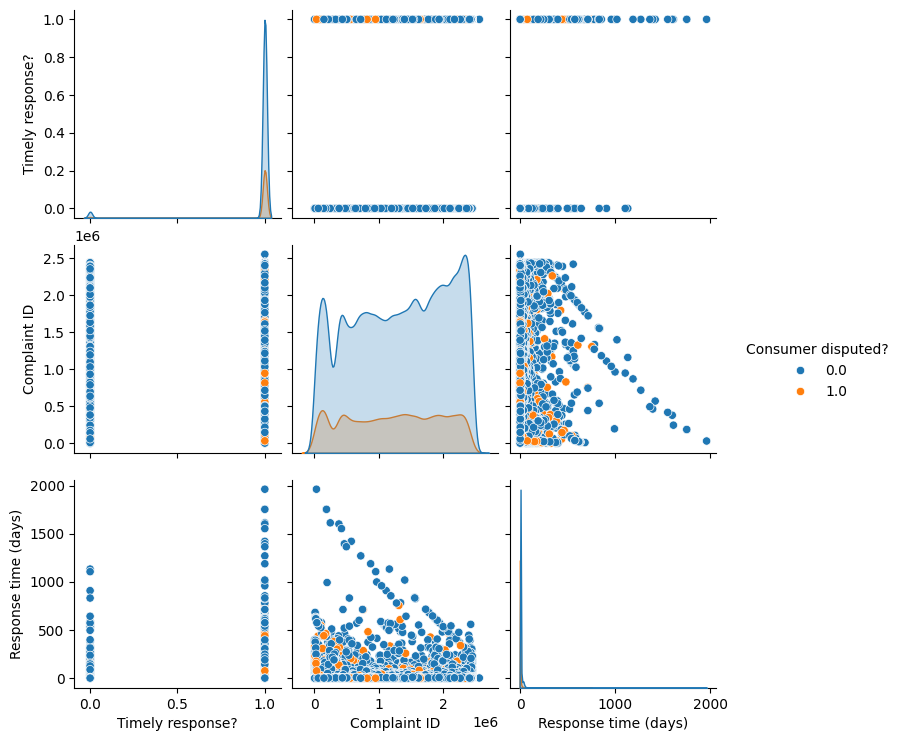

In [34]:
sns.pairplot(df,hue = 'Consumer disputed?')
plt.show()

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example for transforming 'Consumer complaint narrative'
if 'Consumer complaint narrative' in df.columns:
    tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
    narratives_transformed = tfidf.fit_transform(df['Consumer complaint narrative'].fillna(''))

Advanced Feature Engineering for Text Data

In [36]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Year received'] = df['Date received'].dt.year
df['Month received'] = df['Date received'].dt.month

In [37]:
# Feature from text data
df['Complaint length'] = df['Consumer complaint narrative'].apply(len)

# New feature from date columns
df['Response Time'] = (df['Date sent to company'] - df['Date received']).dt.days


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:

scaler = MinMaxScaler()
df[['Complaint length', 'Response Time']] = scaler.fit_transform(df[['Complaint length', 'Response Time']])